# Kwadratury

## Zadanie 1
Zaimplementuj wielomiany Legendre'a.

 Skorzystam z zależności rekurencyjnej wielomianów Legendre'a: ${\displaystyle P_{n+1}(x)={\frac {2n+1}{n+1}}xP_{n}(x)-{\frac {n}{n+1}}P_{n-1}(x)\quad (n=1,2,\dots ).}$

In [17]:
def P(n):
    if n == 0:
        return lambda x: 1 + x * 0
    
    if n == 1:
        return lambda x: x
    
    return lambda x: ((2 * n - 1) / n * x * P(n-1)(x)) - ((n-1) / n * P(n-2)(x))

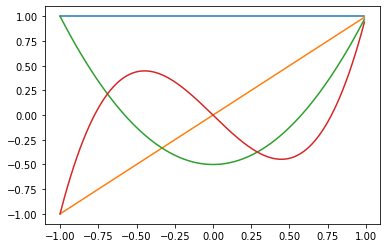

In [18]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(-1.0, 1.0, 0.01)

for i in range(4):
    s = P(i)
    plt.plot(t, s(t))

## Zadanie 2

In [49]:
from numpy.polynomial.legendre import leggauss

def integrate(k, f):
    x, y = leggauss(k)
    x = np.insert(x, 0, -1)
    x = np.append(x, 1)
    s = 0
    for (i, j) in zip(x, x[1:]):
        s += (f(i) + f(j)) / 2 * (j - i)
    return s

## Zadanie 3